In [1]:
%autosave 60
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import pickle

Autosaving every 60 seconds
Automatically created module for IPython interactive environment


In [2]:
DATA_DIR = "C:/Wasif/PD Motor Feature Extraction/TASK2_FEATURES_04_21/"
X_file = "x_repeat_removed_raw_pixels.npy"
y_file = "y_repeat_removed_raw_pixels.npy"
X_index_file = "index_repeat_removed.pickle"

In [3]:
def load_dataset(DATA_DIR):
    X = np.load(DATA_DIR+X_file)
    #For now, only considering the frequency features
    #X = X[:,65536:]
    
    #Scale features
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    
    y = np.load(DATA_DIR+y_file)
    
    with open(DATA_DIR+X_index_file, 'rb') as handle:
        X_index = pickle.load(handle)  
    
    return (X_scaled, y, X_index)

Dataset Loaded
{'mean_fit_time': array([51.24736295, 50.36803832, 48.42276287]), 'std_fit_time': array([1.20018251, 0.10881336, 0.20736197]), 'mean_score_time': array([18.53798523, 18.42930775, 18.54756227]), 'std_score_time': array([0.32694803, 0.28261084, 0.11882813]), 'param_C': masked_array(data=[1000, 100, 1],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1000}, {'C': 100}, {'C': 1}], 'split0_test_score': array([0.60759494, 0.62025316, 0.62658228]), 'split1_test_score': array([0.58860759, 0.58860759, 0.62025316]), 'split2_test_score': array([0.54140127, 0.54140127, 0.62420382]), 'split3_test_score': array([0.52866242, 0.52866242, 0.62420382]), 'split4_test_score': array([0.58598726, 0.58598726, 0.61146497]), 'mean_test_score': array([0.5704507 , 0.57298234, 0.62134161]), 'std_test_score': array([0.03013596, 0.03349456, 0.00534007]), 'rank_test_score': array([3, 2, 1])}


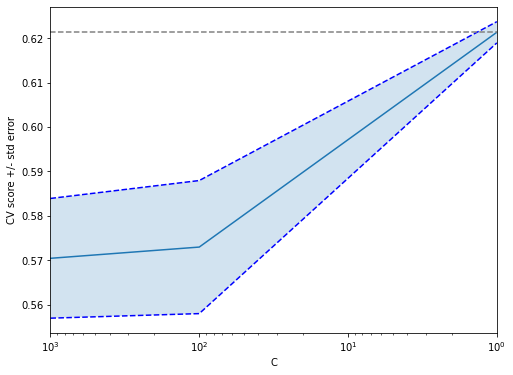

In [4]:
(X, y, X_index) = load_dataset(DATA_DIR)
assert(X.shape[0]==y.shape[0] and y.shape[0]==len(X_index))
print("Dataset Loaded")

#Subset of data for faster development
#X = X[:150]
#y = y[:150]

#print(y)

#make_pipeline(StandardScaler(), SVC(gamma='auto'))
#model = Lasso(random_state=0, max_iter=100000)
model = sklearn.svm.SVC()
#alphas = np.logspace(-4, -0.5, 30)
#alphas = np.logspace(-4, -0.5, 10)
C = [1000, 100, 1]

tuned_parameters = [{'C': C}]
n_folds = 5

clf = GridSearchCV(model, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)

print(clf.cv_results_)

scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(C, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(C, scores + std_error, 'b--')
plt.semilogx(C, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(C, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('C')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([C[0], C[-1]])
plt.show()